Task 1: Prediction using Supervised ML
Description: Predicting the percentage(score) of a student based on the no. of study hours.
Author: Tasabeeh Ahmed

Import the relevant libraries 

In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

Load the data

In [63]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Exploring the descriptive statistic of the variables

In [64]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [65]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Define the dependent and independent variables

In [66]:
y = data['Scores']
x = data['Hours']

Explore the data

In [67]:
x.shape

(25,)

In [68]:
y.shape

(25,)

In [73]:
#reshape x into a matrix(2D object) because sklearn is used
x1 = x.values.reshape(-1,1)
x1.shape

(25, 1)

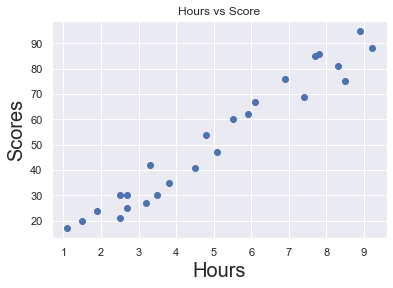

In [74]:
plt.scatter(x1,y)
plt.title('Hours vs Score')
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()

The above graph shows that there is a strong positive correlation between the two variables.

Create the Regression

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y, test_size=0.25, random_state=0)

In [76]:
#fitting the training data
reg = LinearRegression()
reg.fit(x_train,y_train) 

LinearRegression()

In [ ]:
#predicting scores on test data
y_pred = reg.predict(x_test) 
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [77]:
#comparing actual data with predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106


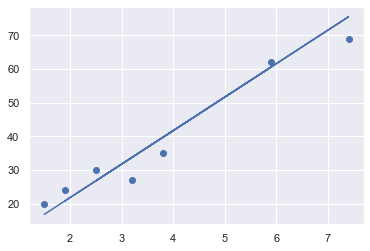

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)
plt.show()

In [78]:
#calculate how well the line fits the data; R squared
reg.score(x_test, y_test)

0.9367661043365055

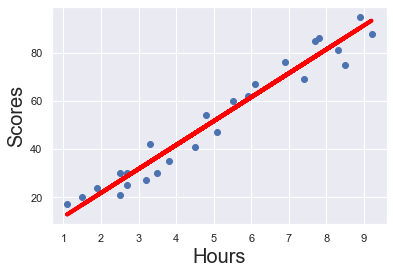

In [79]:
#plotting regression line in the dataset
plt.scatter(x1,y)
yhat = reg.coef_*x + reg.intercept_
fig = plt.plot(x,yhat, lw=4, c='red', label = 'regression line')
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()

In [80]:
#R squared
reg.score(x1,y)

0.9525462098246908

To answer the question: What will be the predicted score in percentage if a student studies for 9.25 hrs/day

In [ ]:
x = reg.predict([[9.25]])
print("The student will score",x,"%")

The student will score [93.89272889] %


Evaluating Metric for Regression

In [ ]:
#check the performance of the linear regression model 
from sklearn.metrics import mean_absolute_error
#This measures the absolute average distance between the real data and the predicted data
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print("MAE:",mae)
#The lower the mae, the better a model fits a dataset.

MAE: 4.130879918502486
